# Car Price Prediction Using Machine Learning with Python

****

### Aim

Predict the cost of used cars using Linear Regression Model and Lasso Regression Model.


### Dataset Features

- Car Brand
- Year
- Sold Price
- Present Price
- KMS Driven
- Fuel Type
- Seller Type
- Transmission Type
- Owners


### Workflow

1. **Collect the data.** We need to collect the car data. This data is required to feed the machine learning model.

2. **Data Pre-processing.** Data pre-processing is the process of transforming raw data into an understandable format. The computer finds it easy to understand numbers.However, reading texts and paragraphs is difficult. The data pre-processing converts the texts and paragraphs into numbers.

3. **Train Test split.** The dataset gets split into Train Data and Test Data. Where, the training data is used to train the machine learning model and the test data is used to evaluate the model to check its performance.

4. **Linear regression model.** Once the dataset is split into Train Data and Test Data, it is fed to the linear regression model. The training data is used to train the linear regression model. We then evaluate this model to check its performance.

5. **Lasso linear regression model.** After training using linear regression model, we use Lasso regression model to get the accuracy score or error percentage and see which model performs better (linear or lasso).


### Project by

Clarina Annet B A


### Section

5CSE-2


### Option

A


## Program

### Importing the Dependencies

In [70]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

### Data Collection and Processing

In [71]:

# Loading data from the csv file to a Pandas Dataframe.

car_dataset = pd.read_csv('car data.csv')

In [72]:

# Printing first five rows of the dataframe.

car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [73]:

# Finding the number of rows and columns.

car_dataset.shape

(301, 9)

In [74]:

# Getting some information from the data set.

car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [75]:

#Checking for the number of missing values.

car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [76]:

# Checking the distribution of categorical data.

print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64



### Encoding the Categorical Data 

In [77]:
# Encoding the "Fuel_Type" Column

car_dataset.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)

# Encoding the "Seller_Type" column.

car_dataset.replace({'Seller_Type':{'Dealer':0, 'Individual':1}}, inplace=True)

# Encoding the "Transmission" column.

car_dataset.replace({'Transmission':{'Manual':0, 'Automatic':1}}, inplace=True)

In [78]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


### Splitting the Data into Train Data and Test Data

In [79]:

X = car_dataset.drop(['Car_Name','Selling_Price'], axis=1)
Y = car_dataset['Selling_Price']

In [80]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [81]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


### Splitting Training and Test Data

In [82]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

### Model Training

### 1. Linear Regression Model

In [83]:
# Loading the Linear Regression Model

lin_reg_model =  LinearRegression()

In [84]:

lin_reg_model.fit(X_train, Y_train)

LinearRegression()

### Model Evaluation

In [85]:

# Predicition on Training Data

training_data_prediction = lin_reg_model.predict(X_train)

In [86]:

# R Squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error: ", error_score)

R squared error:  0.8799451660493701


### Visualizing the Actual Prices and Predicted Prices

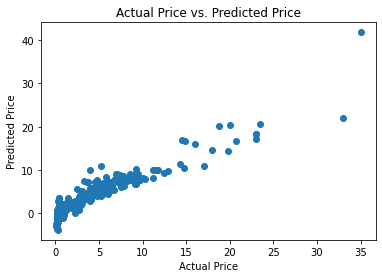

In [87]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs. Predicted Price")
plt.show()

In [88]:

# Predicition on Test Data

test_data_prediction = lin_reg_model.predict(X_test)

In [89]:

# R Squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error: ", error_score)

R squared error:  0.836576671502687


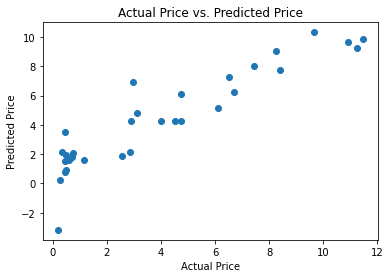

In [90]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs. Predicted Price")
plt.show()

### 2. Lasso Regression Model

In [91]:
# Loading the Lasso Regression Model

lass_reg_model =  Lasso()

In [92]:

lass_reg_model.fit(X_train, Y_train)

Lasso()

### Model Evaluation

In [93]:
# Predicition on Training Data

training_data_prediction = lass_reg_model.predict(X_train)

In [94]:

# R Squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error: ", error_score)

R squared error:  0.8427856123435794


### Visualizing the Actual Prices and Predicted Prices

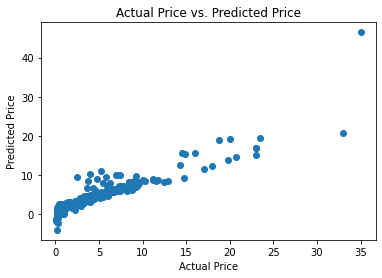

In [95]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs. Predicted Price")
plt.show()

In [96]:

# Predicition on Test Data

test_data_prediction = lass_reg_model.predict(X_test)

In [97]:

# R Squared Error

error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error: ", error_score)

R squared error:  0.8709167941173195


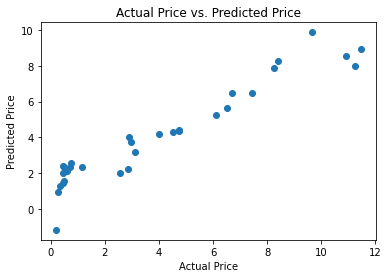

In [98]:

plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs. Predicted Price")
plt.show()

Conclusion: The Lasso Regression Model performs better.

Dataset from: https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho?select=car+data.csv